## NYC Taxi Trip Duration Prediction

# Problem Statement 
Using the NYC Yellow Taxi Trip dataset, the task is to analyze taxi ride records and build a predictive model that can estimate key trip attributes like trip duration or fare based on features such as pickup and drop-off times, locations, and trip distance

# Goal of the Data
The goal of the NYC Yellow Taxi Trip dataset is to analyze taxi ride information to understand travel patterns in New York City and predict key trip outcomes such as fare amount or trip duration

Dataset link: https://www.kaggle.com/datasets/elemento/nyc-yellow-taxi-trip-data?select=yellow_tripdata_2016-01.csv

| Feature Name                     | Description                                                        |
| -------------------------------- | ------------------------------------------------------------------ |
| **VendorID**                     | ID of the taxi service provider that recorded the trip             |
| **tpep_pickup_datetime**         | Date and time when the passenger was picked up                     |
| **tpep_dropoff_datetime**        | Date and time when the passenger was dropped off                   |
| **passenger_count**              | Number of passengers in the taxi                                   |
| **trip_distance**                | Distance of the trip in miles                                      |
| **pickup_longitude**             | Longitude of the pickup location                                   |
| **pickup_latitude**              | Latitude of the pickup location                                    |
| **dropoff_longitude**            | Longitude of the drop-off location                                 |
| **dropoff_latitude**             | Latitude of the drop-off location                                  |
| **RatecodeID**                   | Rate code used for the trip (e.g., standard, airport rate)         |
| **store_and_fwd_flag**           | Indicates if trip data was stored and forwarded later (`Y` or `N`) |
| **payment_type**                 | Method used for payment (	A numeric code signifying how the passenger paid for the trip.1-Credit card,2-Cash3-Nocharge,)                         |
| **fare_amount**                  | Fare charged for the trip (excluding extras)                       |
| **extra**                        | Additional charges (e.g., night or rush hour surcharge)            |
| **mta_tax**                      | Mandatory MTA tax applied to the fare                              |
| **tip_amount**                   | Tip given by the passenger                                         |
| **tolls_amount**                 | Toll charges during the trip                                       |
| **improvement_surcharge**        | Fixed surcharge added to the fare                                  |
| **total_amount**                 | Total amount paid by the passenger                                 |
| **trip_duration** *(engineered)* | Time taken for the trip (dropoff − pickup time)                    |
| **pickup_hour** *(engineered)*   | Hour of the day when pickup occurred                               |
| **pickup_day** *(engineered)*    | Day of the month when pickup occurred                              |


# Import Libraries

In [160]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')


In [161]:
df=pd.read_csv("yellow_taxi_project.csv")
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,01-01-2016 00:00,01-01-2016 00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.00,0.0,0.3,8.80
1,2,01-01-2016 00:00,01-01-2016 00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.00,0.0,0.3,19.30
2,2,01-01-2016 00:00,01-01-2016 00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.00,0.0,0.3,34.30
3,2,01-01-2016 00:00,01-01-2016 00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.00,0.0,0.3,17.30
4,2,01-01-2016 00:00,01-01-2016 00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.00,0.0,0.3,8.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,04-01-2016 17:28,04-01-2016 17:36,1,1.10,-73.956001,40.782047,1,N,-73.964256,40.767979,2,7.5,1.0,0.5,0.00,0.0,0.3,9.30
1048571,1,04-01-2016 17:28,04-01-2016 17:49,1,3.50,-73.975327,40.754677,1,N,-73.977791,40.789856,2,15.5,1.0,0.5,0.00,0.0,0.3,17.30
1048572,1,04-01-2016 17:28,04-01-2016 18:08,1,10.40,-73.781860,40.644707,1,N,-73.799858,40.588844,2,35.5,1.0,0.5,0.00,0.0,0.3,37.30
1048573,1,04-01-2016 17:28,04-01-2016 17:32,1,0.70,-73.984657,40.722603,1,N,-73.988297,40.729671,1,4.5,1.0,0.5,1.85,0.0,0.3,8.15


In [162]:
df.shape

(1048575, 19)

In [163]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,01-01-2016 00:00,01-01-2016 00:00,2,1.10,-73.990372,40.734695,1,N,-73.981842,40.732407,2,7.5,0.5,0.5,0.0,0.0,0.3,8.8
1,2,01-01-2016 00:00,01-01-2016 00:00,5,4.90,-73.980782,40.729912,1,N,-73.944473,40.716679,1,18.0,0.5,0.5,0.0,0.0,0.3,19.3
2,2,01-01-2016 00:00,01-01-2016 00:00,1,10.54,-73.984550,40.679565,1,N,-73.950272,40.788925,1,33.0,0.5,0.5,0.0,0.0,0.3,34.3
3,2,01-01-2016 00:00,01-01-2016 00:00,1,4.75,-73.993469,40.718990,1,N,-73.962242,40.657333,2,16.5,0.0,0.5,0.0,0.0,0.3,17.3
4,2,01-01-2016 00:00,01-01-2016 00:00,3,1.76,-73.960625,40.781330,1,N,-73.977264,40.758514,2,8.0,0.0,0.5,0.0,0.0,0.3,8.8


In [164]:
df.tail()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1048570,1,04-01-2016 17:28,04-01-2016 17:36,1,1.1,-73.956001,40.782047,1,N,-73.964256,40.767979,2,7.5,1.0,0.5,0.00,0.0,0.3,9.30
1048571,1,04-01-2016 17:28,04-01-2016 17:49,1,3.5,-73.975327,40.754677,1,N,-73.977791,40.789856,2,15.5,1.0,0.5,0.00,0.0,0.3,17.30
1048572,1,04-01-2016 17:28,04-01-2016 18:08,1,10.4,-73.781860,40.644707,1,N,-73.799858,40.588844,2,35.5,1.0,0.5,0.00,0.0,0.3,37.30
1048573,1,04-01-2016 17:28,04-01-2016 17:32,1,0.7,-73.984657,40.722603,1,N,-73.988297,40.729671,1,4.5,1.0,0.5,1.85,0.0,0.3,8.15
1048574,1,04-01-2016 17:28,04-01-2016 17:35,1,2.2,-73.960930,40.760990,1,N,-73.941177,40.788143,2,8.5,1.0,0.5,0.00,0.0,0.3,10.30


In [165]:
df.sample()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
1029791,1,04-01-2016 15:14,04-01-2016 15:25,4,3.6,-73.951866,40.766327,1,N,-73.979546,40.733253,2,12.5,0.0,0.5,0.0,0.0,0.3,13.3


Data cleaning


In [166]:
df.duplicated().sum()

np.int64(16)

In [167]:
# drop the duplicate values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [168]:
df = df[(df['fare_amount'] > 0) & (df['trip_distance'] > 0)]
# Negative or zero fares/distances are unrealistic and harm prediction accuracy.


In [169]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
pickup_longitude         0
pickup_latitude          0
RatecodeID               0
store_and_fwd_flag       0
dropoff_longitude        0
dropoff_latitude         0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [170]:
df.describe()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06,1.041098e+06
mean,1.498351e+00,1.718911e+00,1.153158e+01,-7.280706e+01,4.010857e+01,1.039196e+00,-7.292575e+01,4.017466e+01,1.437452e+00,1.268616e+01,2.144703e-01,4.981917e-01,1.518277e+00,3.155289e-01,2.999945e-01,1.553262e+01
std,4.999975e-01,1.310957e+00,7.865021e+03,9.206057e+00,5.071487e+00,3.466484e-01,8.734062e+00,4.811754e+00,5.101808e-01,1.122391e+01,2.748810e-01,3.002017e-02,2.690526e+00,1.923278e+00,1.281588e-03,1.367640e+01
min,1.000000e+00,0.000000e+00,1.000000e-02,-8.110189e+01,0.000000e+00,1.000000e+00,-7.614362e+01,0.000000e+00,1.000000e+00,1.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.100000e-01
25%,1.000000e+00,1.000000e+00,1.080000e+00,-7.399135e+01,4.073382e+01,1.000000e+00,-7.399089e+01,4.073274e+01,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.000000e+00
50%,1.000000e+00,1.000000e+00,1.800000e+00,-7.398144e+01,4.075241e+01,1.000000e+00,-7.397931e+01,4.075268e+01,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.000000e+00,0.000000e+00,3.000000e-01,1.115000e+01
75%,2.000000e+00,2.000000e+00,3.500000e+00,-7.396416e+01,4.076847e+01,1.000000e+00,-7.395972e+01,4.076961e+01,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.050000e+00,0.000000e+00,3.000000e-01,1.680000e+01
max,2.000000e+00,8.000000e+00,8.000010e+06,0.000000e+00,5.726928e+01,9.900000e+01,0.000000e+00,4.823333e+01,4.000000e+00,9.980000e+02,7.000000e+00,8.900000e-01,9.981400e+02,9.235800e+02,3.000000e-01,1.004940e+03


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041098 entries, 0 to 1048574
Data columns (total 19 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1041098 non-null  int64  
 1   tpep_pickup_datetime   1041098 non-null  object 
 2   tpep_dropoff_datetime  1041098 non-null  object 
 3   passenger_count        1041098 non-null  int64  
 4   trip_distance          1041098 non-null  float64
 5   pickup_longitude       1041098 non-null  float64
 6   pickup_latitude        1041098 non-null  float64
 7   RatecodeID             1041098 non-null  int64  
 8   store_and_fwd_flag     1041098 non-null  object 
 9   dropoff_longitude      1041098 non-null  float64
 10  dropoff_latitude       1041098 non-null  float64
 11  payment_type           1041098 non-null  int64  
 12  fare_amount            1041098 non-null  float64
 13  extra                  1041098 non-null  float64
 14  mta_tax                

In [172]:
print("The features of the Dataset are:")
features_list = [feature for feature in df.columns]
for feature in features_list:
    print(feature)
    

The features of the Dataset are:
VendorID
tpep_pickup_datetime
tpep_dropoff_datetime
passenger_count
trip_distance
pickup_longitude
pickup_latitude
RatecodeID
store_and_fwd_flag
dropoff_longitude
dropoff_latitude
payment_type
fare_amount
extra
mta_tax
tip_amount
tolls_amount
improvement_surcharge
total_amount


| Feature Name                     | Description                                                        |
| -------------------------------- | ------------------------------------------------------------------ |
| **VendorID**                     | ID of the taxi service provider that recorded the trip             |
| **tpep_pickup_datetime**         | Date and time when the passenger was picked up                     |
| **tpep_dropoff_datetime**        | Date and time when the passenger was dropped off                   |
| **passenger_count**              | Number of passengers in the taxi                                   |
| **trip_distance**                | Distance of the trip in miles                                      |
| **pickup_longitude**             | Longitude of the pickup location                                   |
| **pickup_latitude**              | Latitude of the pickup location                                    |
| **dropoff_longitude**            | Longitude of the drop-off location                                 |
| **dropoff_latitude**             | Latitude of the drop-off location                                  |
| **RatecodeID**                   | Rate code used for the trip (e.g., standard, airport rate)         |
| **store_and_fwd_flag**           | Indicates if trip data was stored and forwarded later (`Y` or `N`) |
| **payment_type**                 | Method used for payment (cash, credit card, etc.)                  |
| **fare_amount**                  | Fare charged for the trip (excluding extras)                       |
| **extra**                        | Additional charges (e.g., night or rush hour surcharge)            |
| **mta_tax**                      | Mandatory MTA tax applied to the fare                              |
| **tip_amount**                   | Tip given by the passenger                                         |
| **tolls_amount**                 | Toll charges during the trip                                       |
| **improvement_surcharge**        | Fixed surcharge added to the fare                                  |
| **total_amount**                 | Total amount paid by the passenger                                 |


In [173]:
df.describe(include=['O'])


,tpep_pickup_datetime,tpep_dropoff_datetime,store_and_fwd_flag
count,1041098,1041098,1041098
unique,5349,5699,2
top,01-01-2016 01:12,01-01-2016 01:22,N
freq,532,561,1034756


In [174]:
# Convert datetime columns

df['tpep_pickup_datetime'] = pd.to_datetime(
    df['tpep_pickup_datetime'],
    dayfirst=True  # tells pandas as the day comes first
)

df['tpep_dropoff_datetime'] = pd.to_datetime(
    df['tpep_dropoff_datetime'],
    dayfirst=True
)


df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

# Extract time features
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day'] = df['tpep_pickup_datetime'].dt.day
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_weekday'] = df['tpep_pickup_datetime'].dt.weekday

df['dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour

# Trip duration in minutes
df['trip_duration_min'] = (
    df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']
).dt.total_seconds() / 60


In [175]:
df.drop(columns=[
    'tpep_pickup_datetime',
    'tpep_dropoff_datetime'
], inplace=True)


# Visualization

In [176]:
from typing import List
def  display_col_value_counts(col_names):
    for col_name in col_names:
        print('*'*30)
        print(f"column:{col_name}")   # column name subtitle
        print('*'*30)
        print("The datatype:",df[col_name].dtypes)# the datatype of the feature
        print("The number of null values:",df[col_name].isnull().sum())
        print(df[col_name].describe()) # feature discription
        print("")
        
        # check if the unique values in the column are less than 10 to display frequently
        if df[col_name].nunique() < 10:
            print("There are",df[col_name].nunique(),"Unique values")
            print("The frequency Table")
            print(df[col_name].value_counts())
        else:
            print("Frequency table not displayed, there are ",df[col_name].nunique(),"Unique values")
        print("")
        
display_col_value_counts(df.columns)

******************************
column:VendorID
******************************
The datatype: int64
The number of null values: 0
count    1.041098e+06
mean     1.498351e+00
std      4.999975e-01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      2.000000e+00
Name: VendorID, dtype: float64

There are 2 Unique values
The frequency Table
VendorID
1    522266
2    518832
Name: count, dtype: int64

******************************
column:passenger_count
******************************
The datatype: int64
The number of null values: 0
count    1.041098e+06
mean     1.718911e+00
std      1.310957e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      8.000000e+00
Name: passenger_count, dtype: float64

There are 9 Unique values
The frequency Table
passenger_count
1    696247
2    176064
5     53852
3     52502
6     32348
4     30070
0         9
8         4
7         2
Name: count, dtype: int64

*************

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041098 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1041098 non-null  int64  
 1   passenger_count        1041098 non-null  int64  
 2   trip_distance          1041098 non-null  float64
 3   pickup_longitude       1041098 non-null  float64
 4   pickup_latitude        1041098 non-null  float64
 5   RatecodeID             1041098 non-null  int64  
 6   store_and_fwd_flag     1041098 non-null  object 
 7   dropoff_longitude      1041098 non-null  float64
 8   dropoff_latitude       1041098 non-null  float64
 9   payment_type           1041098 non-null  int64  
 10  fare_amount            1041098 non-null  float64
 11  extra                  1041098 non-null  float64
 12  mta_tax                1041098 non-null  float64
 13  tip_amount             1041098 non-null  float64
 14  tolls_amount           

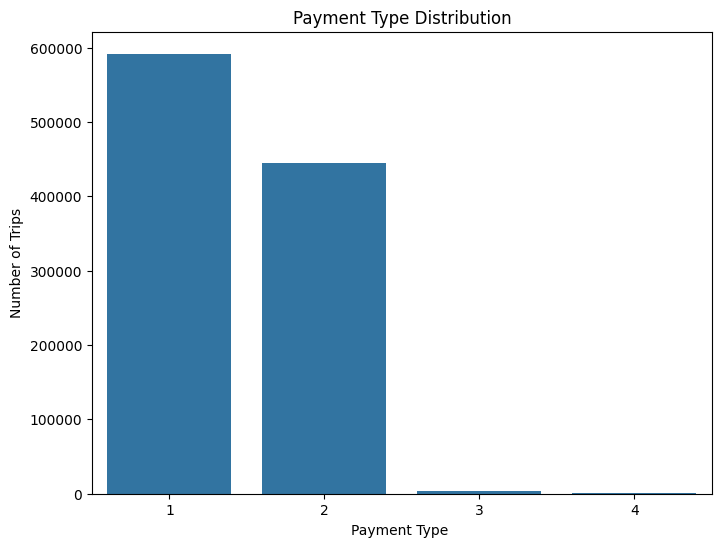

In [178]:
plt.figure(figsize=(8,6))
sns.countplot(x='payment_type', data=df)
plt.title('Payment Type Distribution')
plt.xlabel('Payment Type ')
plt.ylabel('Number of Trips')
plt.show()

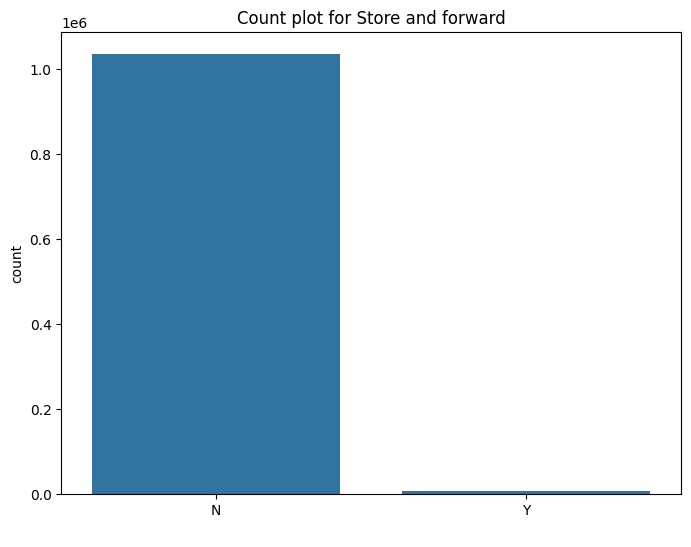

In [179]:
plt.figure(figsize=(8,6))
sns.countplot(x='store_and_fwd_flag', data=df)
plt.title('Count plot for Store and forward')
plt.xlabel(' ')
plt.ylabel('count')
plt.show()

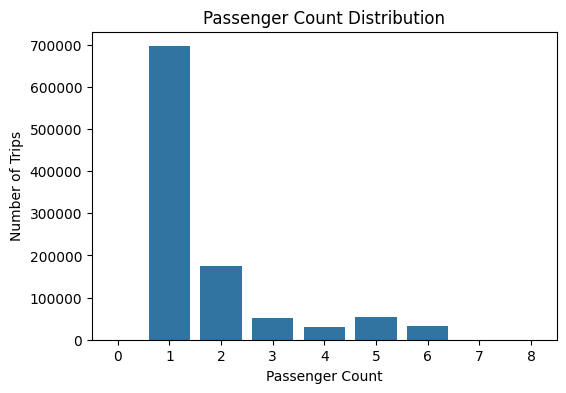

In [180]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['passenger_count'])
plt.title("Passenger Count Distribution")
plt.xlabel("Passenger Count")
plt.ylabel("Number of Trips")
plt.show()


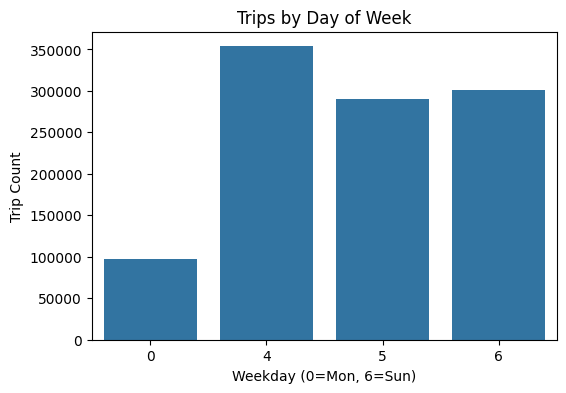

In [181]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['pickup_weekday'])
plt.title("Trips by Day of Week")
plt.xlabel("Weekday (0=Mon, 6=Sun)")
plt.ylabel("Trip Count")
plt.show()


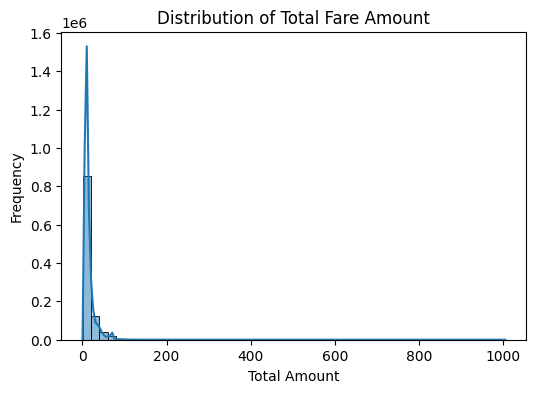

In [182]:
plt.figure(figsize=(6,4))
sns.histplot(df['total_amount'], bins=50, kde=True)
plt.title("Distribution of Total Fare Amount")
plt.xlabel("Total Amount")
plt.ylabel("Frequency")
plt.show()


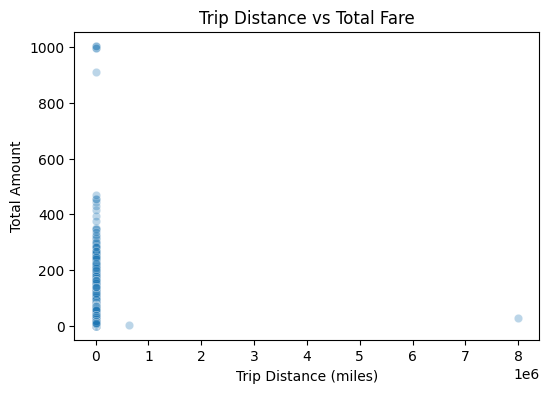

In [183]:
plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df['trip_distance'],
    y=df['total_amount'],
    alpha=0.3
)
plt.title("Trip Distance vs Total Fare")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Total Amount")
plt.show()


Inferences:
* Most taxi trips have 1–2 passengers
* Fare increases with trip distance ,Relationship is approximately linear
* Card and cash payments dominate
* Weekdays show higher taxi usage
* Longer trips generally cost more
* Fare amount is right-skewed. Majority of trips are low to medium cost

In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041098 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1041098 non-null  int64  
 1   passenger_count        1041098 non-null  int64  
 2   trip_distance          1041098 non-null  float64
 3   pickup_longitude       1041098 non-null  float64
 4   pickup_latitude        1041098 non-null  float64
 5   RatecodeID             1041098 non-null  int64  
 6   store_and_fwd_flag     1041098 non-null  object 
 7   dropoff_longitude      1041098 non-null  float64
 8   dropoff_latitude       1041098 non-null  float64
 9   payment_type           1041098 non-null  int64  
 10  fare_amount            1041098 non-null  float64
 11  extra                  1041098 non-null  float64
 12  mta_tax                1041098 non-null  float64
 13  tip_amount             1041098 non-null  float64
 14  tolls_amount           

# Encoding

In [185]:
df['store_and_fwd_flag']=df['store_and_fwd_flag'].map({'N':0,'Y':1})
df['store_and_fwd_flag'].unique()

array([0, 1])

In [186]:
df.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_hour,trip_duration_min
0,2,2,1.10,-73.990372,40.734695,1,0,-73.981842,40.732407,2,...,0.0,0.0,0.3,8.8,0,1,1,4,0,0.0
1,2,5,4.90,-73.980782,40.729912,1,0,-73.944473,40.716679,1,...,0.0,0.0,0.3,19.3,0,1,1,4,0,0.0
2,2,1,10.54,-73.984550,40.679565,1,0,-73.950272,40.788925,1,...,0.0,0.0,0.3,34.3,0,1,1,4,0,0.0
3,2,1,4.75,-73.993469,40.718990,1,0,-73.962242,40.657333,2,...,0.0,0.0,0.3,17.3,0,1,1,4,0,0.0
4,2,3,1.76,-73.960625,40.781330,1,0,-73.977264,40.758514,2,...,0.0,0.0,0.3,8.8,0,1,1,4,0,0.0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041098 entries, 0 to 1048574
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1041098 non-null  int64  
 1   passenger_count        1041098 non-null  int64  
 2   trip_distance          1041098 non-null  float64
 3   pickup_longitude       1041098 non-null  float64
 4   pickup_latitude        1041098 non-null  float64
 5   RatecodeID             1041098 non-null  int64  
 6   store_and_fwd_flag     1041098 non-null  int64  
 7   dropoff_longitude      1041098 non-null  float64
 8   dropoff_latitude       1041098 non-null  float64
 9   payment_type           1041098 non-null  int64  
 10  fare_amount            1041098 non-null  float64
 11  extra                  1041098 non-null  float64
 12  mta_tax                1041098 non-null  float64
 13  tip_amount             1041098 non-null  float64
 14  tolls_amount           

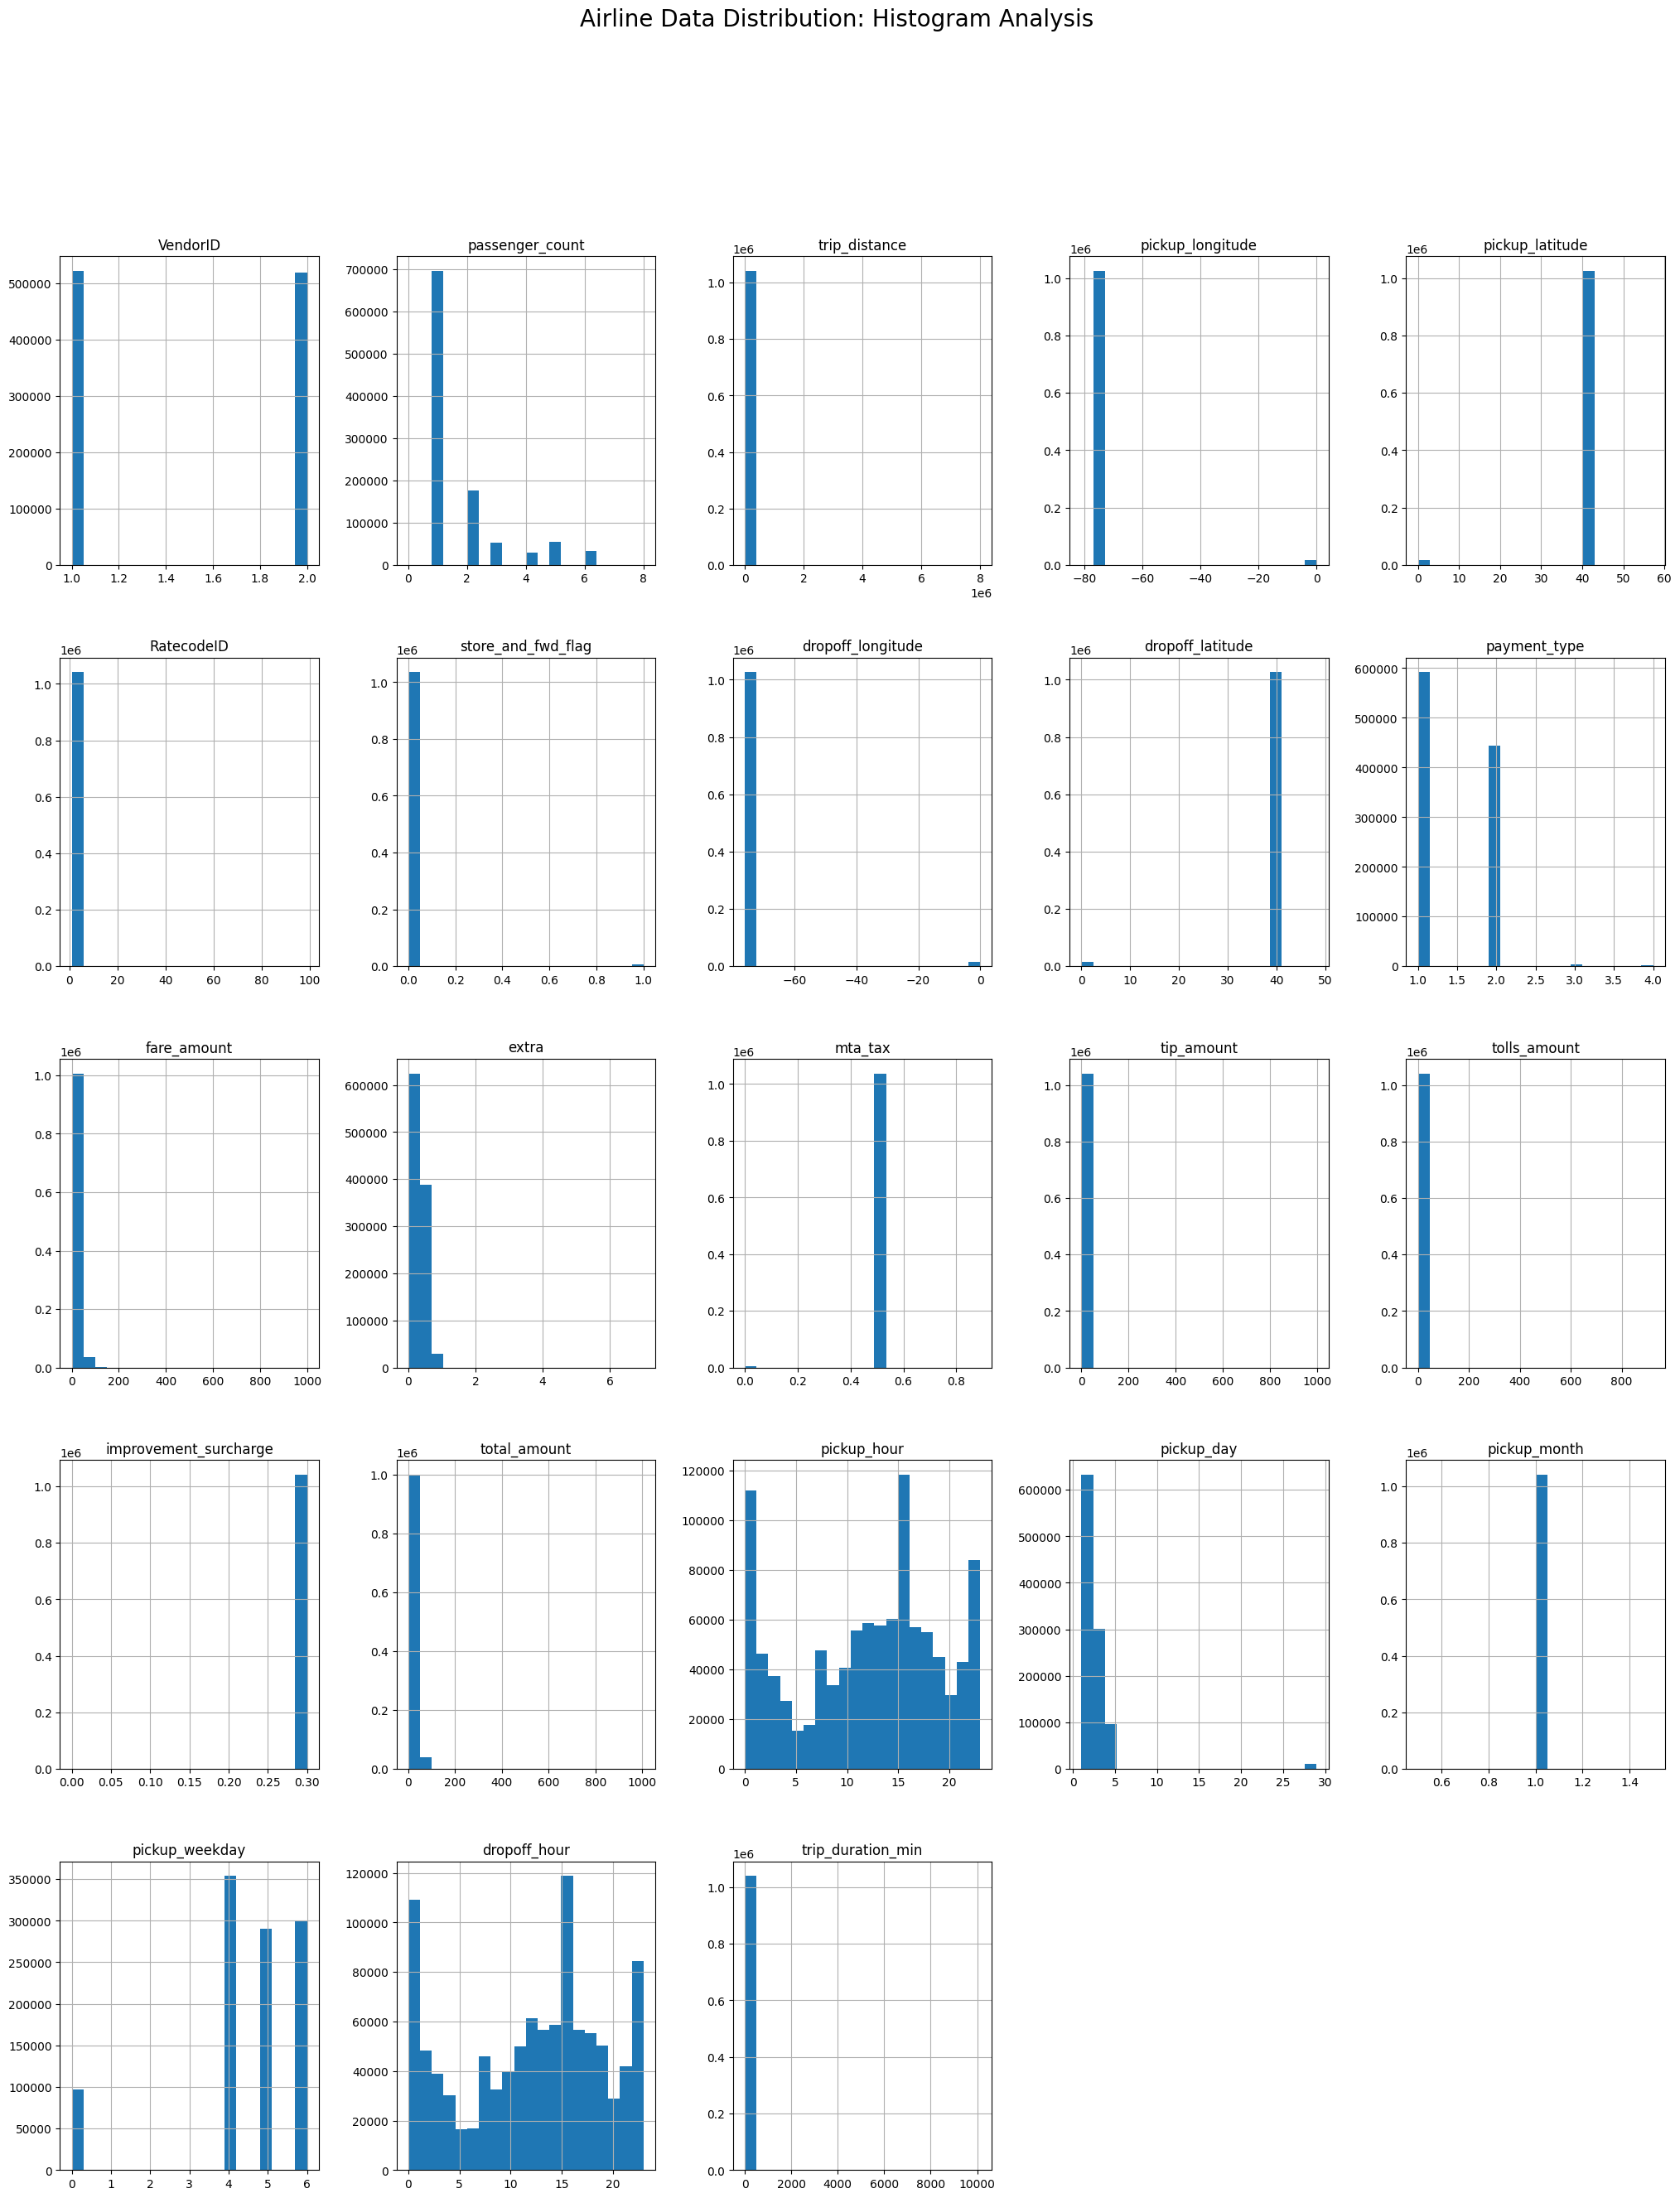

In [188]:
df.hist(bins=20,figsize=(25,30))
plt.suptitle('Airline Data Distribution: Histogram Analysis',fontsize=20)
plt.show()

<Axes: >

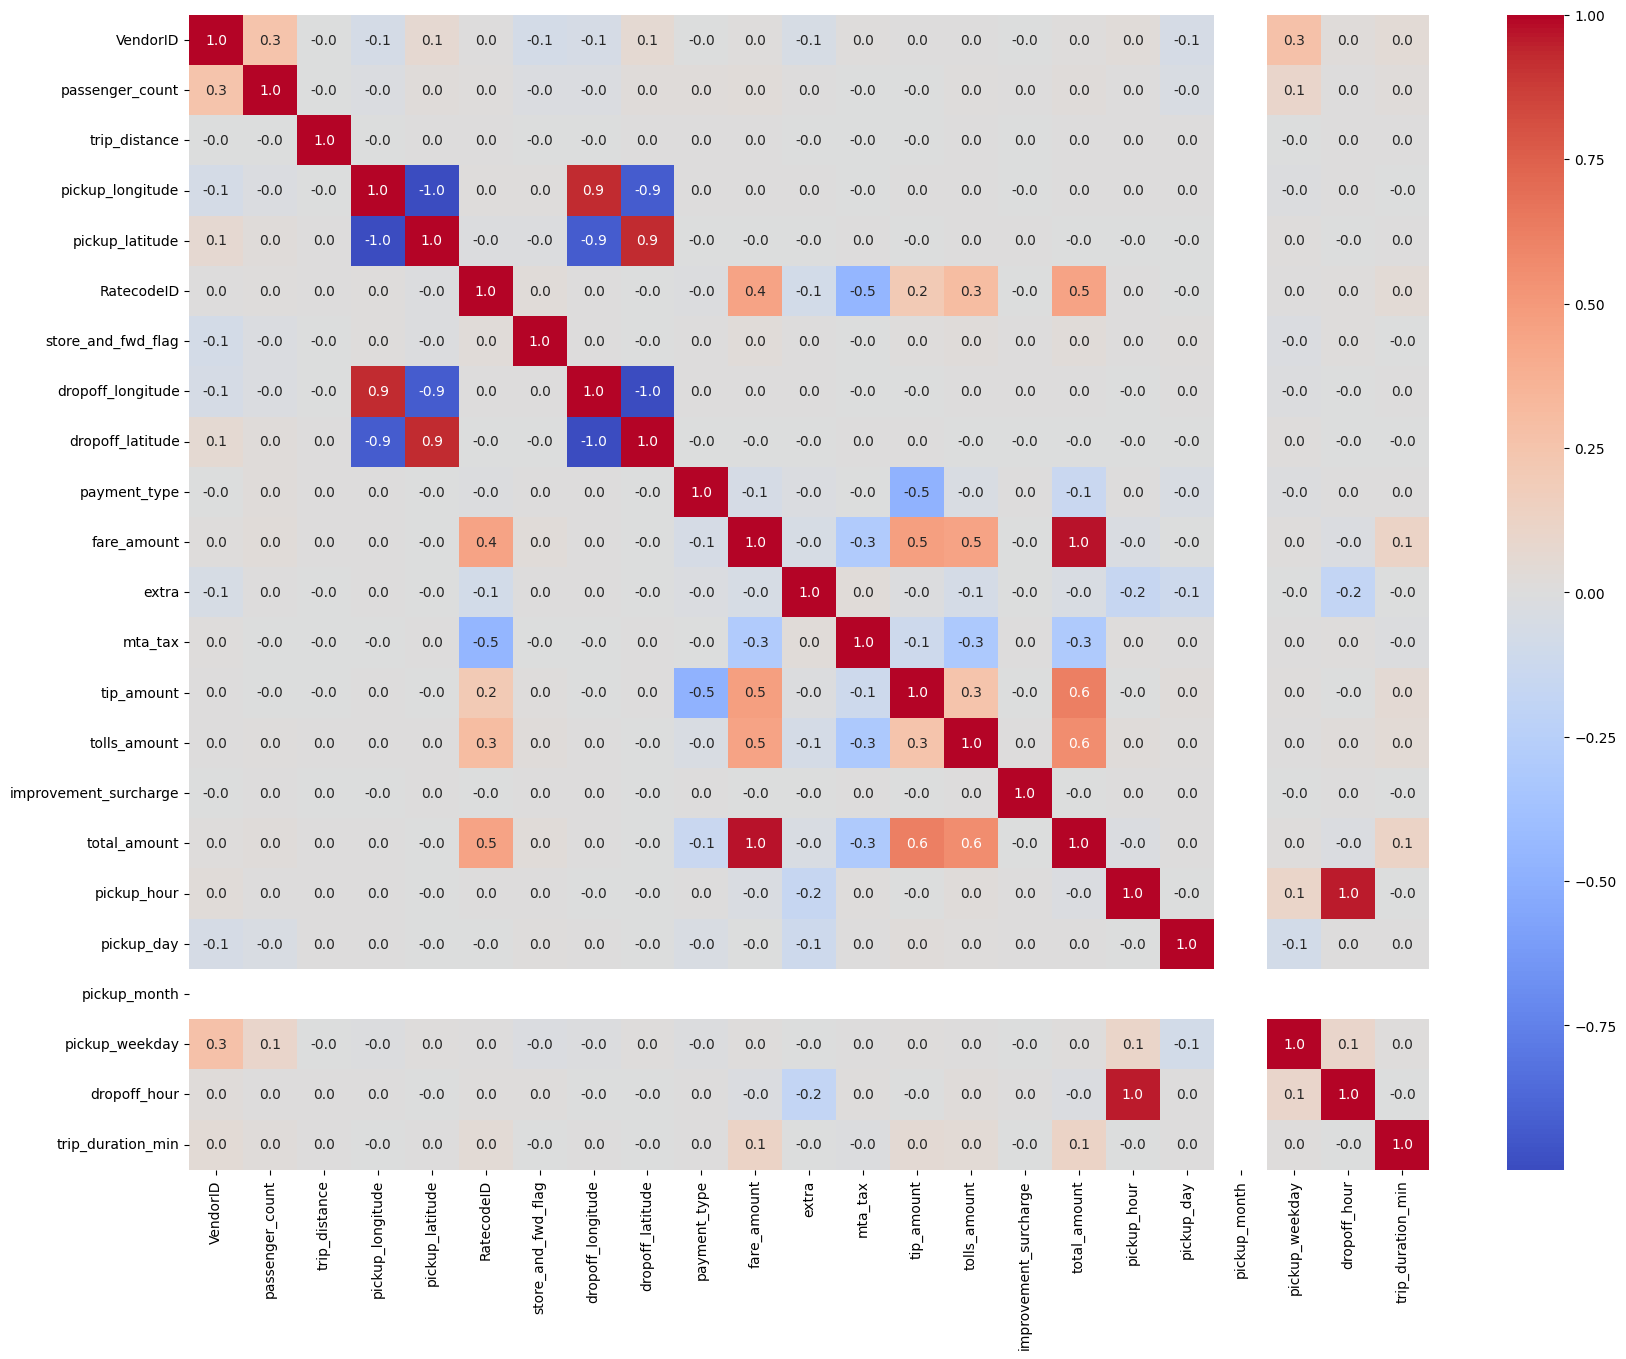

In [189]:
plt.figure(figsize=(20,15))
df.corr(numeric_only=True)
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap="coolwarm",fmt='0.01f')

In [190]:
correlation_matrix = df.corr()
threshold= 0.5 # set the correlation threshold

# find pairs of features with high correlation 
highly_correlated_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        # check if the absolute correlation exceeds the threshold
        if abs(correlation_matrix.iloc[i,j]) > threshold:
            highly_correlated_pairs.append((correlation_matrix.columns[i],correlation_matrix.columns[j]))
            
# print all pairs of highly correlated features 
print(highly_correlated_pairs)

[('pickup_latitude', 'pickup_longitude'), ('dropoff_longitude', 'pickup_longitude'), ('dropoff_longitude', 'pickup_latitude'), ('dropoff_latitude', 'pickup_longitude'), ('dropoff_latitude', 'pickup_latitude'), ('dropoff_latitude', 'dropoff_longitude'), ('total_amount', 'fare_amount'), ('total_amount', 'tip_amount'), ('total_amount', 'tolls_amount'), ('dropoff_hour', 'pickup_hour')]


In [191]:
# corr_target = df.corr()['total_amount'].sort_values(ascending=False)

# high_corr = corr_target[abs(corr_target) > 0.5]
# high_corr


In [192]:
df.head()

,VendorID,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,pickup_day,pickup_month,pickup_weekday,dropoff_hour,trip_duration_min
0,2,2,1.10,-73.990372,40.734695,1,0,-73.981842,40.732407,2,...,0.0,0.0,0.3,8.8,0,1,1,4,0,0.0
1,2,5,4.90,-73.980782,40.729912,1,0,-73.944473,40.716679,1,...,0.0,0.0,0.3,19.3,0,1,1,4,0,0.0
2,2,1,10.54,-73.984550,40.679565,1,0,-73.950272,40.788925,1,...,0.0,0.0,0.3,34.3,0,1,1,4,0,0.0
3,2,1,4.75,-73.993469,40.718990,1,0,-73.962242,40.657333,2,...,0.0,0.0,0.3,17.3,0,1,1,4,0,0.0
4,2,3,1.76,-73.960625,40.781330,1,0,-73.977264,40.758514,2,...,0.0,0.0,0.3,8.8,0,1,1,4,0,0.0


In [193]:
df.columns

Index(['VendorID', 'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount', 'pickup_hour', 'pickup_day',
       'pickup_month', 'pickup_weekday', 'dropoff_hour', 'trip_duration_min'],
      dtype='object')

In [194]:
df.drop(['extra','mta_tax','tolls_amount','improvement_surcharge'],axis=1,inplace=True)

In [195]:
df.drop(['VendorID','RatecodeID','payment_type',
         'passenger_count','store_and_fwd_flag',
         'pickup_month','pickup_day'],inplace=True,axis=1)

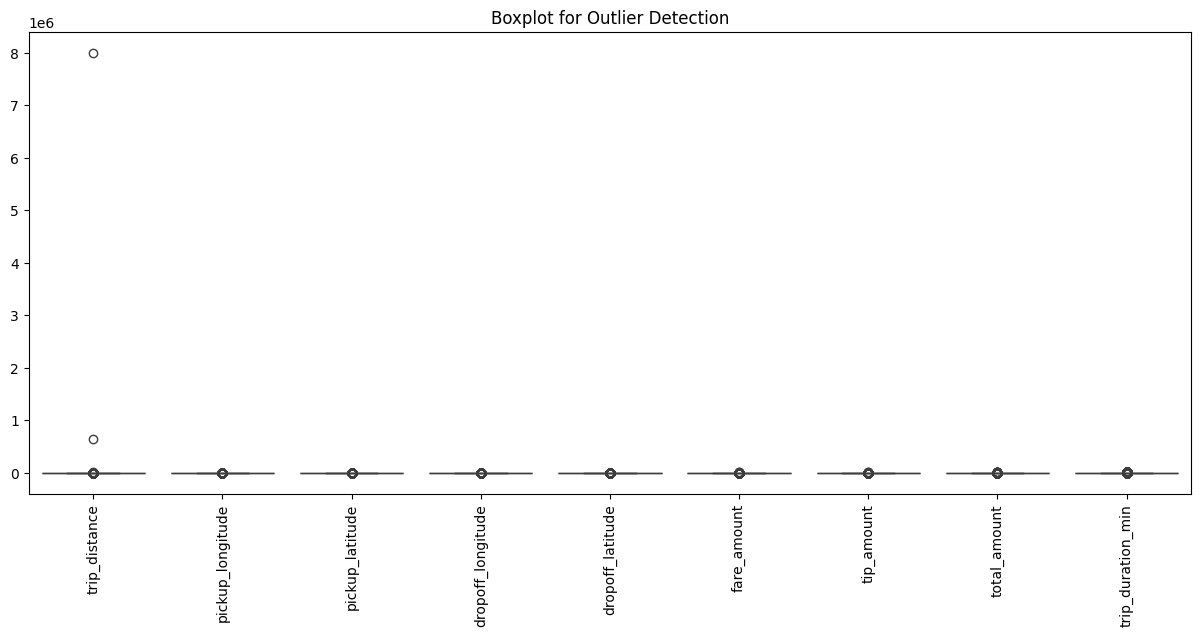

In [196]:
plt.figure(figsize=(15,6))
sns.boxplot(df.select_dtypes(include=['int64','float64']))
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()



In [197]:
numeric_cols = df.select_dtypes(include=['int64','float64']).columns

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) |
                (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

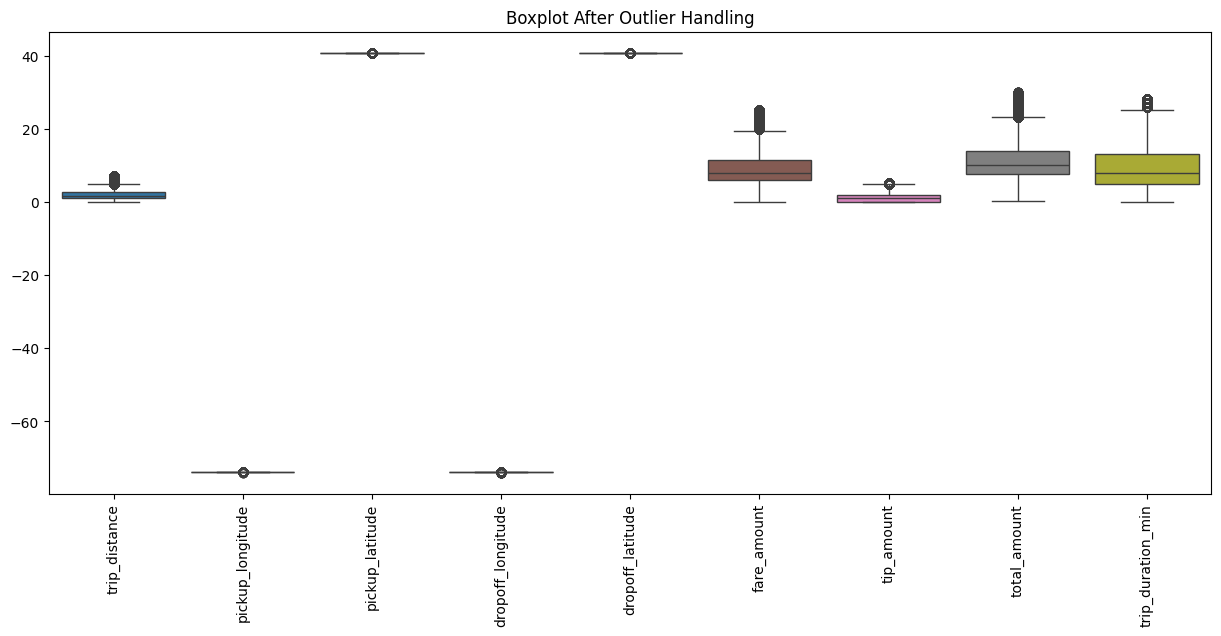

In [198]:
plt.figure(figsize=(15,6))
sns.boxplot(data=df_clean.select_dtypes(include=['int64','float64']))
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Handling")
plt.show()


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1041098 entries, 0 to 1048574
Data columns (total 12 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   trip_distance      1041098 non-null  float64
 1   pickup_longitude   1041098 non-null  float64
 2   pickup_latitude    1041098 non-null  float64
 3   dropoff_longitude  1041098 non-null  float64
 4   dropoff_latitude   1041098 non-null  float64
 5   fare_amount        1041098 non-null  float64
 6   tip_amount         1041098 non-null  float64
 7   total_amount       1041098 non-null  float64
 8   pickup_hour        1041098 non-null  int32  
 9   pickup_weekday     1041098 non-null  int32  
 10  dropoff_hour       1041098 non-null  int32  
 11  trip_duration_min  1041098 non-null  float64
dtypes: float64(9), int32(3)
memory usage: 91.3 MB


In [200]:
X = df.drop('total_amount', axis=1)
y = df['total_amount']


# Train-Test Split


In [201]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [202]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [203]:
models= {
    "Linear_Regression":LinearRegression(),
    "RandomForest_Regressor":RandomForestRegressor(),
    "GradientBoosting_Regressor":GradientBoostingRegressor(),
    "DecisionTree_Regressor":DecisionTreeRegressor(),

}


## Model Training


In [205]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gr = GradientBoostingRegressor()

lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
gr.fit(X_train, y_train)

GradientBoostingRegressor()

## Model Evaluation


In [206]:
models = {'Linear Regression': lr, 'Decision Tree': dt, 'Random Forest': rf, 'Gradient Boosting':gr}

for name, model in models.items():
    y_pred = model.predict(X_test)
    print(name)
    print("R2:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print()


Linear Regression
R2: 0.9928367657450036
MAE: 0.6019732609990366

Decision Tree
R2: 0.9734263829406552
MAE: 0.15041100758824186

Random Forest
R2: 0.9719412067990552
MAE: 0.14628111180487122

Gradient Boosting
R2: 0.9838954884633214
MAE: 0.40858250496432547



In [207]:
final_model= RandomForestRegressor(n_estimators=100,max_depth=15,random_state=42)
final_model.fit(X_train, y_train)

# Prediction
y_pred = final_model.predict(X_test)

In [209]:
print("R2:",r2_score(y_test,y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2: 0.971840297896127
MAE: 0.16343790265115574
RMSE: 2.328480030266884


## Final Report 

Based on the analysis of the `NYC Yellow Taxi Trip` dataset for predicting the `Total Fare Amount`, the Random Forest Regressor model demonstrated the best performance among all the tested machine learning models.

✔ Trip distance and trip duration are the most influential factors in fare prediction

✔ Longer trips and higher distances result in significantly higher fares

✔ Passenger count has minimal impact on the total fare amount

✔ Datetime-based features (pickup hour and trip duration) improve model accuracy

✔ Random Forest handles non-linearity and outliers better than other models

✔ Proper data preprocessing and outlier removal significantly enhanced performance

In [212]:
import pickle
import gradio as gr

with open('taxi_fare_model.pkl','wb') as file:
    pickle.dump(final_model,file)
    import pickle

pickle.dump(scaler, open("scaler.pkl", "wb"))




In [213]:
df.columns

Index(['trip_distance', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'fare_amount', 'tip_amount',
       'total_amount', 'pickup_hour', 'pickup_weekday', 'dropoff_hour',
       'trip_duration_min'],
      dtype='object')

In [ ]:
import pickle
import pandas as pd
import gradio as gr
import numpy as np

# Load only the model (that's all you have right now)
with open('taxi_fare_model.pkl', 'rb') as file:
    model = pickle.load(file)
 
scaler = pickle.load(open("scaler.pkl", "rb"))


def predict_total_amount(
    trip_distance,
    pickup_longitude,
    pickup_latitude,
    dropoff_longitude,
    dropoff_latitude,
    fare_amount,
    tip_amount,
    pickup_hour,
    pickup_weekday,
    dropoff_hour,
    trip_duration_min
):
    input_data = np.array([[ 
        trip_distance,
        pickup_longitude,
        pickup_latitude,
        dropoff_longitude,
        dropoff_latitude,
        fare_amount,
        tip_amount,
        pickup_hour,
        pickup_weekday,
        dropoff_hour,
        trip_duration_min
    ]])

    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)

    return f"Predicted Total Fare Amount: ${prediction[0]:.2f}"

interface = gr.Interface(
    fn=predict_total_amount,
    inputs=[
        gr.Number(label="Trip Distance (Km)"),
        gr.Number(label="Pickup Longitude"),
        gr.Number(label="Pickup Latitude"),
        gr.Number(label="Dropoff Longitude"),
        gr.Number(label="Dropoff Latitude"),
        gr.Number(label="Fare Amount ($)"),
        gr.Number(label="Tip Amount ($)"),
        gr.Number(label="Pickup Hour (0–23)"),
        gr.Number(label="Pickup Weekday (0=Mon, 6=Sun)"),
        gr.Number(label="Dropoff Hour (0–23)"),
        gr.Number(label="Trip Duration (minutes)")
    ],
    outputs="text",
    title="🚖 NYC Yellow Taxi Fare Prediction",
    description="Predict total taxi fare using trip, location, and time details"
)

interface.launch()


* Running on local URL:  http://127.0.0.1:7862
* To create a public link, set `share=True` in `launch()`.
